#COVID-19 Outbreak Analysis
In this code, we are going to look at 

- How many people get affected by coronavirus every day?

- What is the distribution of the number of people affected across the globe?

- Which countries have flattened the curve? In other words, which countries have controlled the rate of spread of COVID-19?

In [1]:
# Cloning the GitHub repository.
!git clone https://github.com/CSSEGISandData/COVID-19.git

Cloning into 'COVID-19'...
remote: Enumerating objects: 644162, done.
remote: Counting objects: 100% (3723/3723), done.
remote: Compressing objects: 100% (1739/1739), done.
remote: Total 644162 (delta 2008), reused 3695 (delta 1984), pack-reused 640439
Receiving objects: 100% (644162/644162), 7.78 GiB | 24.74 MiB/s, done.
Resolving deltas: 100% (560697/560697), done.
Updating files: 100% (2362/2362), done.


In [2]:
# Storing the path of 'time_series_covid19_confirmed_global.csv'' in 'conf_csv' variable.
conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

In [3]:
# Storing the path of 'time_series_covid19_deaths_global.csv'' in 'deaths_csv' variable.
deaths_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [4]:
# Storing the path of 'time_series_covid19_recovered_global.csv' in 'rec_csv' variable.
rec_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

###Import all required libraries

In [5]:
import pandas as pd # Data processing 
import matplotlib.pyplot as plt # Data visualisation
import seaborn as sns # Data visualisation
import folium # Cartograms / maps
import datetime # Work with date and time values

%matplotlib inline

In [6]:
# DataFrame for the total confirmed cases.
conf_df = pd.read_csv(conf_csv)

In [7]:
conf_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/23/23,1/24/23,1/25/23,1/26/23,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,208097,208289,208324,208324,208432,208435,208435,208502,208545,208552
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334101,334113,334124,334135,334144,334153,334157,334157,334167,334177
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271346,271354,271360,271364,271369,271369,271376,271376,271378,271385
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47820,47820,47820,47820,47820,47839,47839,47839,47839,47839
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105095,105184,105184,105184,105184,105184,105184,105184,105184,105184


In [8]:
# DataFrame for the total deaths due to coronavirus.
deaths_df = pd.read_csv(deaths_csv)
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/23/23,1/24/23,1/25/23,1/26/23,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7870,7871,7872,7872,7875,7876,7876,7879,7882,7882
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3596,3596,3596,3596,3596,3596,3596,3596,3596,3596
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1930,1931,1931,1931,1931,1931,1931,1931,1931,1931


In [9]:
# DataFrame for the total number of patients recovered from coronavirus.
rec_df = pd.read_csv(rec_csv)
rec_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/23/23,1/24/23,1/25/23,1/26/23,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
conf_df.shape

(289, 1111)

In [26]:
conf_df['Country/Region'].isnull().sum()

0

In [27]:
conf_df = conf_df.dropna(subset=['Long','Lat'])

In [28]:
conf_df.shape

(287, 1111)

In [11]:
# Total confirmed cases reported across the globe.
global_cases = conf_df.iloc[:, 4:].apply(sum, axis=0)
global_cases

1/22/20          557
1/23/20          657
1/24/20          944
1/25/20         1437
1/26/20         2120
             ...    
1/28/23    670217331
1/29/23    670340293
1/30/23    670498117
1/31/23    670708473
2/1/23     671003725
Length: 1107, dtype: int64

In [12]:
# Converting the indices to datetime values.
global_cases.index = pd.to_datetime(global_cases.index) # The datetime value is formatted in the yyyy-mm-dd format.
global_cases

2020-01-22          557
2020-01-23          657
2020-01-24          944
2020-01-25         1437
2020-01-26         2120
                ...    
2023-01-28    670217331
2023-01-29    670340293
2023-01-30    670498117
2023-01-31    670708473
2023-02-01    671003725
Length: 1107, dtype: int64

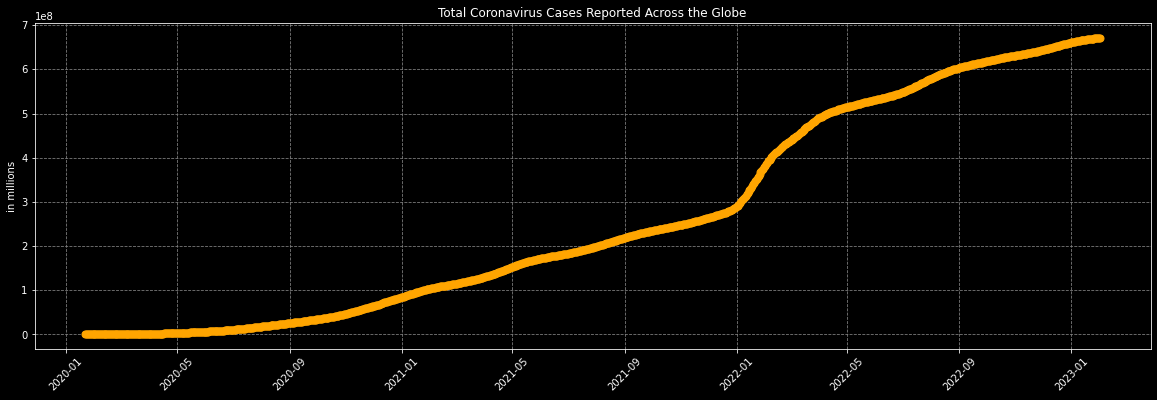

In [16]:
# Line plot for the total number of coronavirus confirmed cases reported across the world.
plt.style.use('dark_background')
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported Across the Globe')
plt.plot(global_cases.index, global_cases, c='orange', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.ylabel('in millions')
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

In [13]:
# Total confirmed cases in India.
india_cases = conf_df[conf_df['Country/Region'] == 'India'].iloc[:, 4:].apply(sum, axis=0)
india_cases.index = pd.to_datetime(india_cases.index)

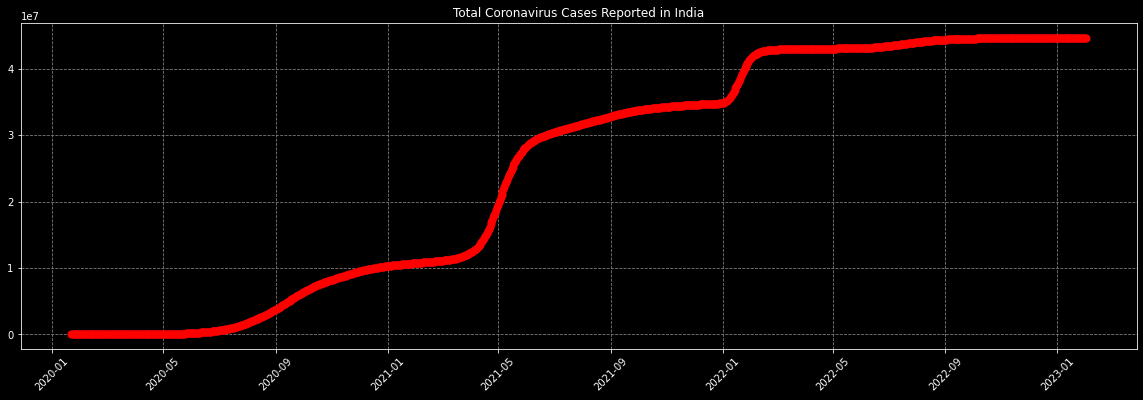

In [17]:
# Line plot for the total number of coronavirus confirmed cases reported in India.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported in India')
plt.plot(india_cases.index, india_cases, c='r', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

In [14]:
# Total confirmed cases in China.
china_cases = conf_df[conf_df['Country/Region'] == 'China'].iloc[:, 4:].apply(sum, axis=0)
china_cases.index = pd.to_datetime(china_cases.index) # The datetime value is formatted in the yyyy-mm-dd format.

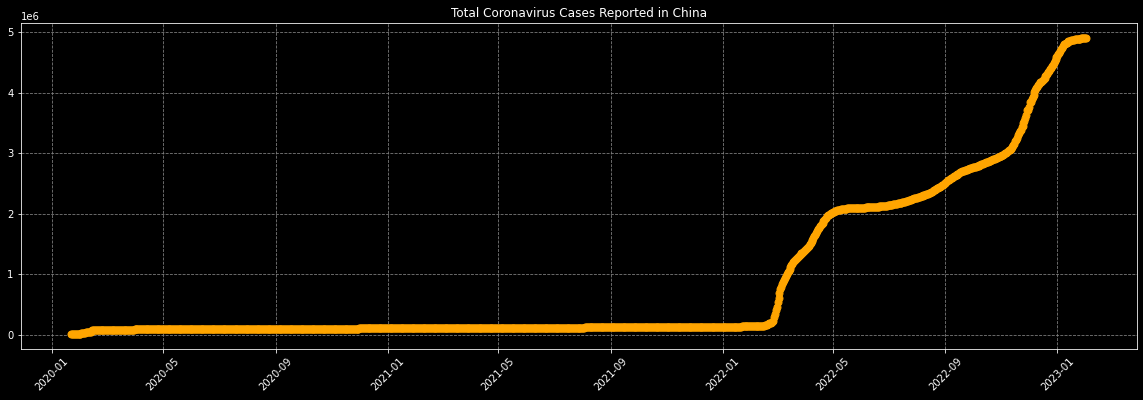

In [18]:
# Line plot for the total number of coronavirus confirmed cases reported in China only.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported in China')
plt.plot(china_cases.index, china_cases, c='orange', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

In [15]:
# Total confirmed cases in the US.
us_cases = conf_df[conf_df['Country/Region'] == 'US'].iloc[:, 4:].apply(sum, axis=0)
us_cases.index = pd.to_datetime(us_cases.index)

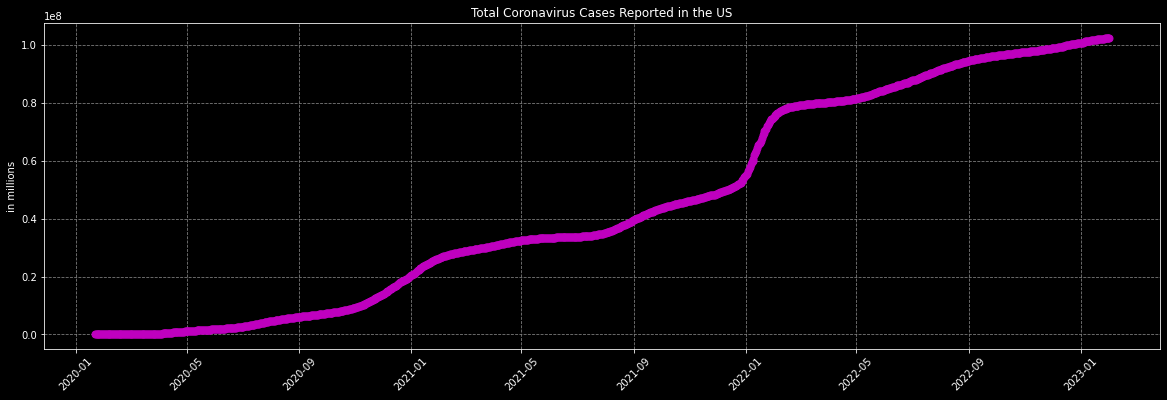

In [19]:
# Line plot for the total number of coronavirus confirmed cases reported in the US.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported in the US')
plt.plot(us_cases.index, us_cases, c='m', linewidth=2, marker='o', markersize=7)
plt.xticks(rotation=45)
plt.ylabel("in millions")
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

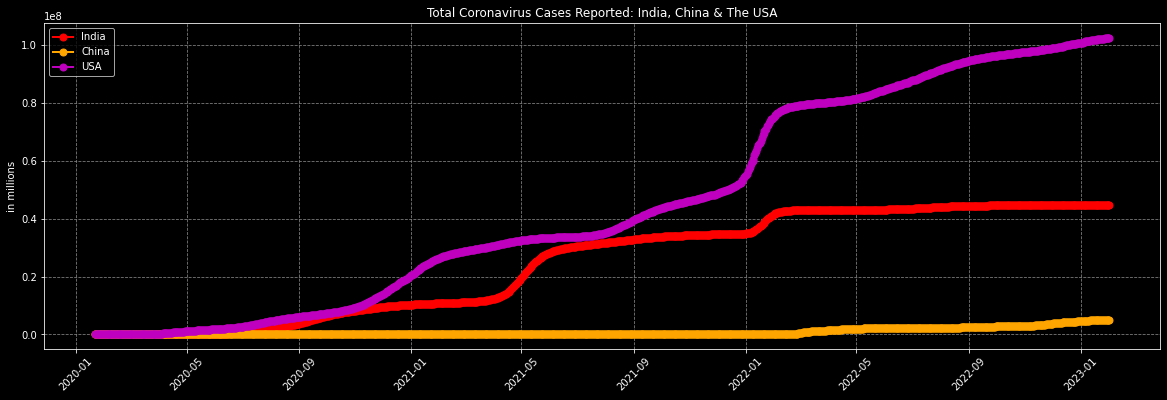

In [20]:
# Line plot to compare the total number of coronavirus confirmed cases reported in India, China & the USA.
plt.figure(figsize=(20, 6))
plt.title('Total Coronavirus Cases Reported: India, China & The USA')
plt.plot(india_cases.index, india_cases, c='red', linewidth=2, marker='o', markersize=7, label='India')
plt.plot(china_cases.index, china_cases, c='orange', linewidth=2, marker='o', markersize=7, label='China')
plt.plot(us_cases.index, us_cases, c='m', linewidth=2, marker='o', markersize=7, label='USA')
plt.xticks(rotation=45)
plt.ylabel('in millions')
plt.grid(True, 'major', linestyle='--', c='grey')
plt.legend()
plt.show()

The USA started testing for coronavirus in bulk after March 15, 2020.

At the beginning of the last week of March, the total confirmed cases of coronavirus in the USA surpassed the same in China.

In [21]:
# The grouped DataFrame having the total coronavirus confirmed cases across the globe in descending order.
grouped_conf_df = conf_df.groupby(by='Country/Region', as_index=False).sum()
desc_grp_conf_df = grouped_conf_df.sort_values(by=conf_df.columns[-1], ascending=False)
desc_grp_conf_df.head()

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,1/23/23,1/24/23,1/25/23,1/26/23,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23
186,US,40.000000,-100.000000,1,1,2,2,5,5,5,...,102027471,102082918,102184931,102248943,102267594,102272030,102274637,102301714,102336754,102451346
80,India,20.593684,78.962880,0,0,0,0,0,0,0,...,44683328,44683430,44683562,44683661,44683754,44683863,44683943,44684009,44684120,44684248
63,France,77.103595,-118.075614,0,0,2,3,3,3,4,...,39690337,39697613,39702995,39708282,39712963,39713004,39713004,39722301,39729161,39733692
67,Germany,51.165691,10.451526,0,0,0,0,0,1,4,...,37684456,37701193,37715000,37728155,37739472,37739472,37739472,37758773,37779833,37796790
24,Brazil,-14.235000,-51.925300,0,0,0,0,0,0,0,...,36730913,36751410,36768677,36768677,36791267,36791267,36794261,36807814,36824580,36837943


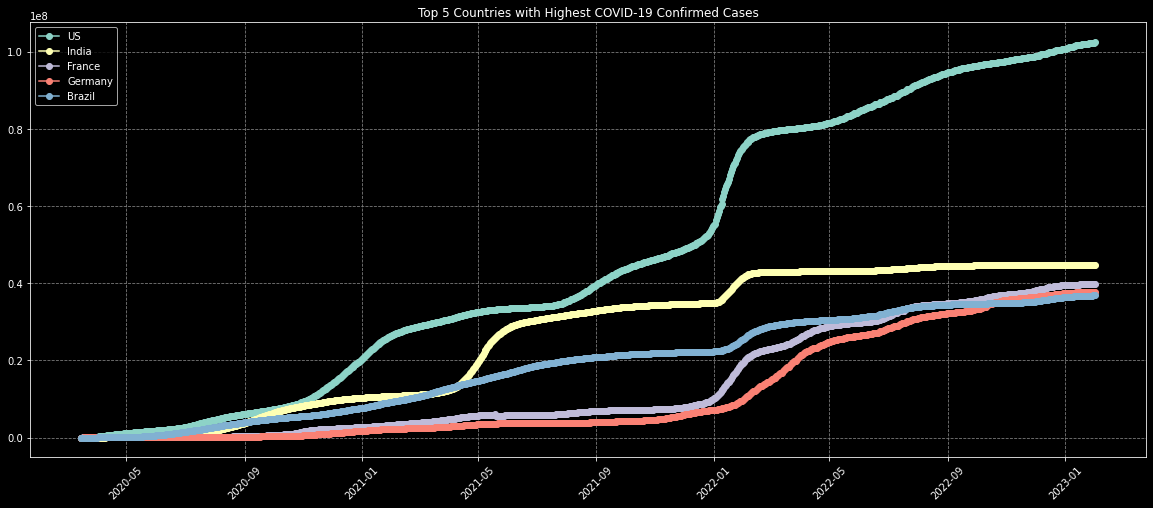

In [22]:
# Top 5 countries with the highest number of coronavirus confirmed cases starting from March 15, 2020.
plt.figure(figsize=(20, 8))
plt.title('Top 5 Countries with Highest COVID-19 Confirmed Cases')
for region in desc_grp_conf_df.head()['Country/Region']:
  # conf_series = high_to_low_conf_df.loc[high_to_low_conf_df['Country/Region'] == region, high_to_low_conf_df.columns[3:]].values[0]
  plt.plot(global_cases.index[53:], desc_grp_conf_df[desc_grp_conf_df['Country/Region'] == region].iloc[0, 56:], '-o', label=region)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


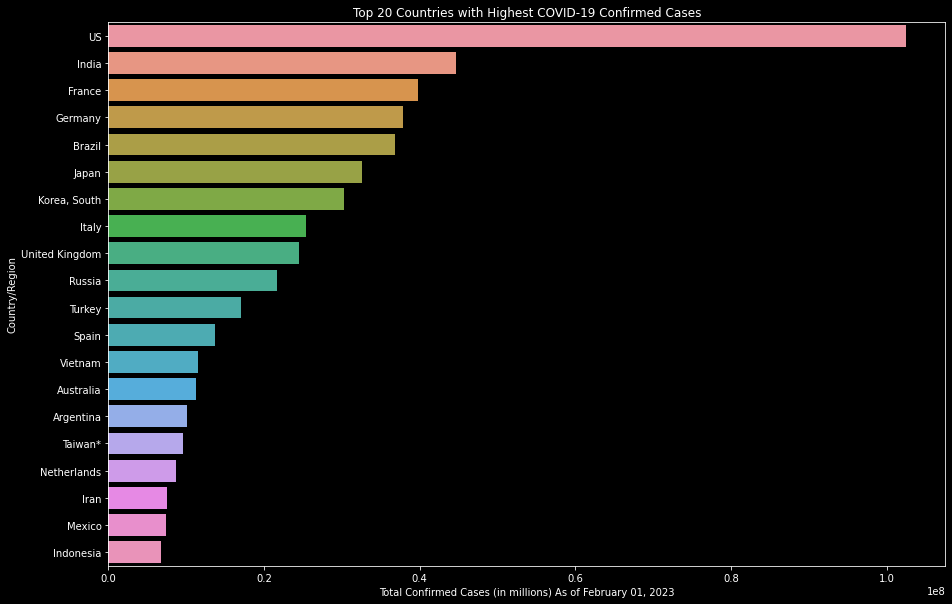

In [23]:
# Get the latest date.
last_col = conf_df.columns[-1]
# Modify the latest date in the 'Month DD, YYYY' format.
latest_date = datetime.datetime.strptime(last_col, '%m/%d/%y').strftime('%B %d, %Y')

# Create a bivariate bar chart displaying the top 20 countries having the most number of coronavirus confirmed cases.
plt.figure(figsize=(15, 10))
plt.title('Top 20 Countries with Highest COVID-19 Confirmed Cases')
sns.barplot(desc_grp_conf_df[last_col].head(20), desc_grp_conf_df['Country/Region'].head(20), orient='h')
plt.xlabel(f'Total Confirmed Cases (in millions) As of {latest_date}')
plt.show()

In [29]:
# The DataFrame for the total confirmed cases in China only.
conf_china_df = conf_df[conf_df['Country/Region'] == 'China']

# Map to show the distribution of confirmed coronavirus cases in China (regular markers).
china_map = folium.Map(location=[30.9756, 112.2707], width='100%', height='90%', tiles='Stamen Toner', zoom_start=4.25)
for i in conf_china_df.index:
  folium.Marker(location=[conf_china_df.loc[i, 'Lat'], conf_china_df.loc[i, 'Long']],
                popup= conf_china_df.loc[i, 'Province/State'] + "\n" + str(conf_china_df.loc[i, last_col])).add_to(china_map)
china_map

In [30]:
# Map to show the distribution of confirmed coronavirus cases in China (circular markers).
china_map = folium.Map(location=[30.9756, 112.2707], width='100%', height='90%', tiles='Stamen Toner', zoom_start=4.5)
for i in conf_china_df.index:
  folium.Circle(radius=int(conf_china_df.loc[i, last_col]) * 2,
                location=[conf_china_df.loc[i, 'Lat'], conf_china_df.loc[i, 'Long']],
                popup= conf_china_df.loc[i, 'Province/State'] + "\n" + str(conf_china_df.loc[i, last_col]),
                color='crimson', fill=True, fill_color='crimson').add_to(china_map)
china_map

In [31]:
# Map to show the distribution of confirmed coronavirus cases in China excluding Wuhan (circular markers).
china_map = folium.Map(location=[30.9756, 112.2707], width='100%', height='100%', tiles='Stamen Toner', zoom_start=4.5)
for i in conf_china_df.sort_values(by=last_col, ascending=False).index[1:]:
  folium.Circle(radius=int(conf_china_df.loc[i, last_col]) * 100,
                location=[conf_china_df.loc[i, 'Lat'], conf_china_df.loc[i, 'Long']],
                popup= conf_china_df.loc[i, 'Province/State'] + "\n" + str(conf_china_df.loc[i, last_col]),
                color='crimson', fill=True, fill_color='crimson').add_to(china_map)
china_map

In [32]:
# Map to show the distribution of confirmed coronavirus cases across the world (circular markers).
world_map = folium.Map(location=[0, 0], width='100%', height='80%', tiles='Stamen Toner', zoom_start=2.25)
for i in conf_df.index:
  folium.Circle(location=[conf_df.loc[i, 'Lat'], conf_df.loc[i, 'Long']], 
                radius=int(conf_df.loc[i, last_col]), 
                popup=conf_df.loc[i, 'Country/Region'] + '\n' + str(conf_df.loc[i, last_col]),
                color='crimson', fill=True, fill_color='crimson').add_to(world_map)
world_map

In [33]:
# Map to show the distribution of confirmed coronavirus cases across the USA (circular markers).
us_conf_csv = '/content/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
us_conf_df = pd.read_csv(us_conf_csv)
us_conf_df = us_conf_df.dropna()

us_map = folium.Map(location=[39.381266, -97.922211], width='100%', height='80%', tiles='Stamen Toner', zoom_start=4)
for i in us_conf_df.index:
  folium.Circle(location=[us_conf_df.loc[i, 'Lat'], us_conf_df.loc[i, 'Long_']], 
                radius=int(us_conf_df.loc[i, last_col]), 
                popup=us_conf_df.loc[i, 'Province_State'] + '\n' + str(us_conf_df.loc[i, last_col]),
                color='crimson', fill=True, fill_color='crimson').add_to(us_map)
us_map

Output hidden; open in https://colab.research.google.com to view.

In [34]:
# First step to create the DataFrame for the non-cumulative confirmed coronavirus cases starting from January 22, 2020.
non_cum_conf_df = desc_grp_conf_df.iloc[:, :4]
non_cum_conf_df

,Country/Region,Lat,Long,1/22/20
186,US,40.000000,-100.000000,1
80,India,20.593684,78.962880,0
63,France,77.103595,-118.075614,0
67,Germany,51.165691,10.451526,0
24,Brazil,-14.235000,-51.925300,0
...,...,...,...,...
197,Winter Olympics 2022,39.904200,116.407400,0
76,Holy See,41.902900,12.453400,0
5,Antarctica,-71.949900,23.347000,0
107,MS Zaandam,0.000000,0.000000,0


In [35]:
# Final step to create the DataFrame for the non-cumulative confirmed coronavirus cases starting from January 22, 2020.
for i in range(len(desc_grp_conf_df.columns[3:]) - 1):
  series = desc_grp_conf_df[desc_grp_conf_df.columns[3 + (i + 1) ]] - desc_grp_conf_df[desc_grp_conf_df.columns[3 + i]]
  non_cum_conf_df[desc_grp_conf_df.columns[3 + (i + 1)]] = series 

non_cum_conf_df.head()

<ipython-input-35-39bab4ebdb8a>:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  non_cum_conf_df[desc_grp_conf_df.columns[3 + (i + 1)]] = series


,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,1/23/23,1/24/23,1/25/23,1/26/23,1/27/23,1/28/23,1/29/23,1/30/23,1/31/23,2/1/23
186,US,40.000000,-100.000000,1,0,1,0,3,0,0,...,30710,55447,102013,64012,18651,4436,2607,27077,35040,114592
80,India,20.593684,78.962880,0,0,0,0,0,0,0,...,89,102,132,99,93,109,80,66,111,128
63,France,77.103595,-118.075614,0,0,2,1,0,0,1,...,8828,7276,5382,5287,4681,41,0,9297,6860,4531
67,Germany,51.165691,10.451526,0,0,0,0,0,1,3,...,16072,16737,13807,13155,11317,0,0,19301,21060,16957
24,Brazil,-14.235000,-51.925300,0,0,0,0,0,0,0,...,12860,20497,17267,0,22590,0,2994,13553,16766,13363


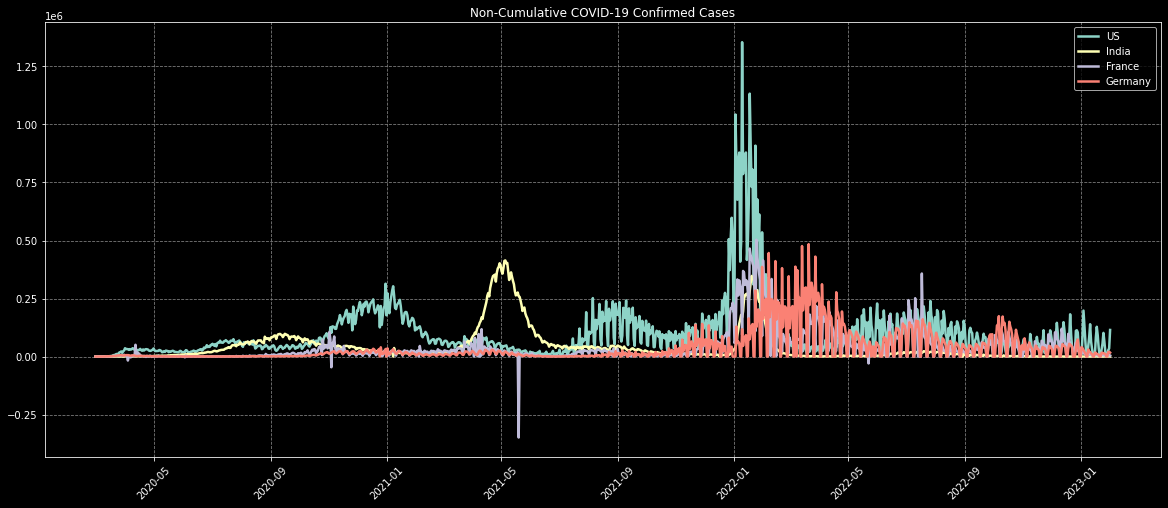

In [36]:
# Plot the first four countries having non-cumulative confirmed cases in the above DataFrame.
plt.figure(figsize=(20, 8))
plt.title('Non-Cumulative COVID-19 Confirmed Cases')
for region in non_cum_conf_df.iloc[:4, :]['Country/Region']:
  plt.plot(global_cases.index[39:], non_cum_conf_df[non_cum_conf_df['Country/Region'] == region].iloc[0, 42:], lw=2.5, label=region)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

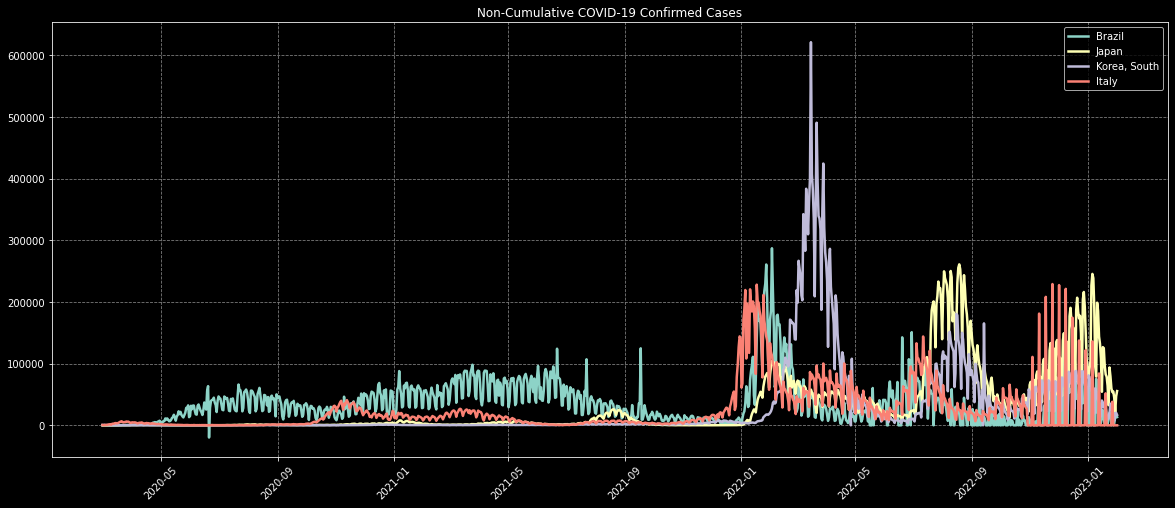

In [37]:
# Plot the next four countries having non-cumulative confirmed cases in the above DataFrame.
plt.figure(figsize=(20, 8))
plt.title('Non-Cumulative COVID-19 Confirmed Cases')
for region in non_cum_conf_df.iloc[4:8, :]['Country/Region']:
  plt.plot(global_cases.index[39:], non_cum_conf_df[non_cum_conf_df['Country/Region'] == region].iloc[0, 42:], lw=2.5, label=region)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, 'major', linestyle='--', c='grey')
plt.show()

In [38]:
# List of countries that have flattened the curve.
countries = []
for i in non_cum_conf_df.index:
  last_14_days = []
  for j in range(14):
    last_14_days.append(non_cum_conf_df.loc[i, non_cum_conf_df.columns[-(j + 1)]])
  if sum(last_14_days) <= 1400:
    countries.append(non_cum_conf_df.loc[i, 'Country/Region'])
countries

['Turkey',
 'Vietnam',
 'Greece',
 'Thailand',
 'Slovakia',
 'Iraq',
 'Hungary',
 'Bangladesh',
 'Jordan',
 'Pakistan',
 'Kazakhstan',
 'Norway',
 'Bulgaria',
 'Morocco',
 'Croatia',
 'Tunisia',
 'Cuba',
 'United Arab Emirates',
 'Mongolia',
 'Nepal',
 'Belarus',
 'Latvia',
 'Saudi Arabia',
 'Azerbaijan',
 'West Bank and Gaza',
 'Bahrain',
 'Sri Lanka',
 'Kuwait',
 'Dominican Republic',
 'Burma',
 'Estonia',
 'Moldova',
 'Venezuela',
 'Egypt',
 'Libya',
 'Ethiopia',
 'Qatar',
 'Honduras',
 'Armenia',
 'Bosnia and Herzegovina',
 'Oman',
 'North Macedonia',
 'Kenya',
 'Albania',
 'Botswana',
 'Luxembourg',
 'Mauritius',
 'Montenegro',
 'Kosovo',
 'Algeria',
 'Nigeria',
 'Uzbekistan',
 'Mozambique',
 'Laos',
 'Iceland',
 'Afghanistan',
 'Kyrgyzstan',
 'El Salvador',
 'Trinidad and Tobago',
 'Maldives',
 'Ghana',
 'Namibia',
 'Uganda',
 'Jamaica',
 'Cambodia',
 'Rwanda',
 'Cameroon',
 'Malta',
 'Barbados',
 'Angola',
 'Congo (Kinshasa)',
 'Senegal',
 'Malawi',
 "Cote d'Ivoire",
 'Suriname'

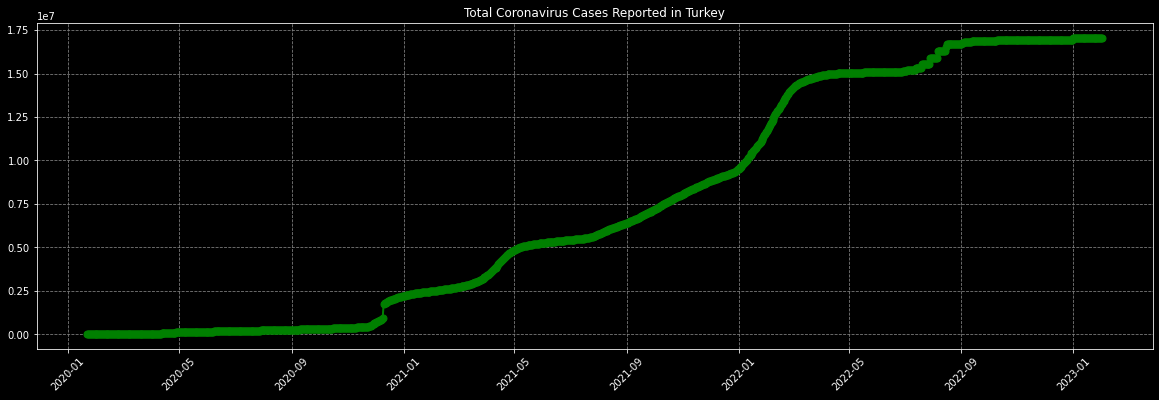

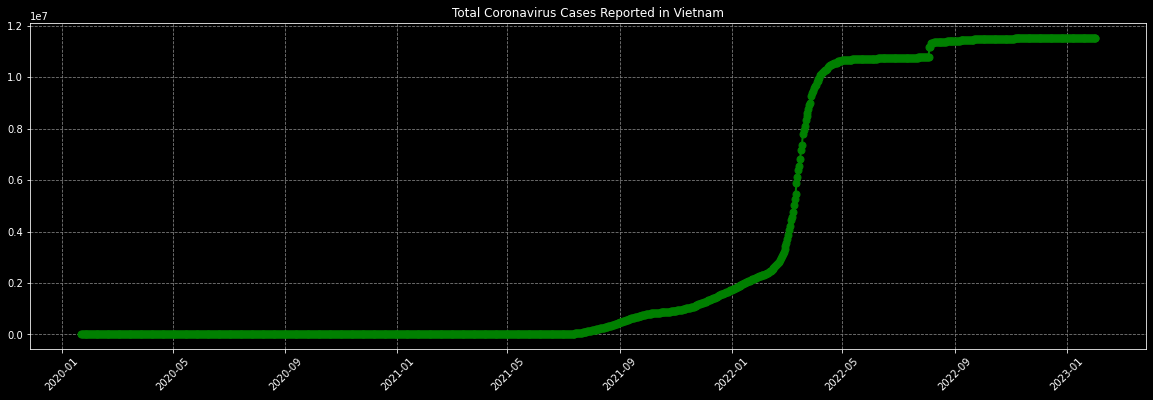

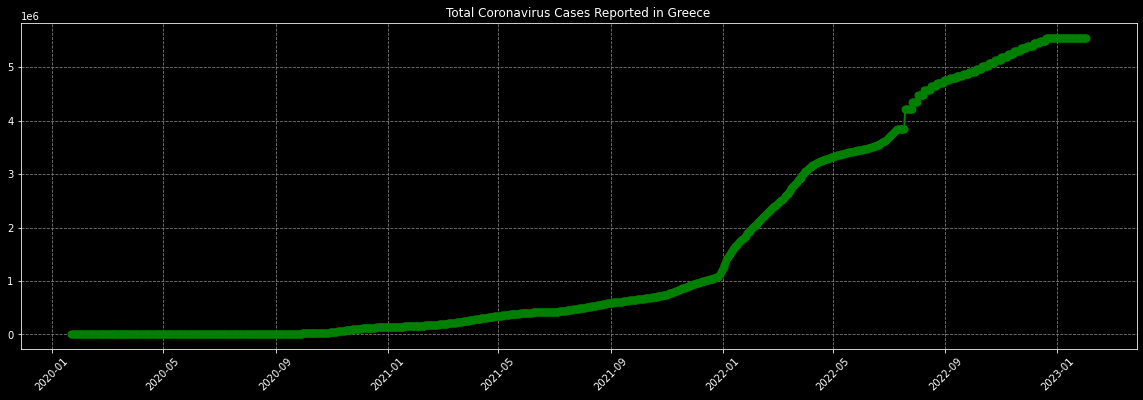

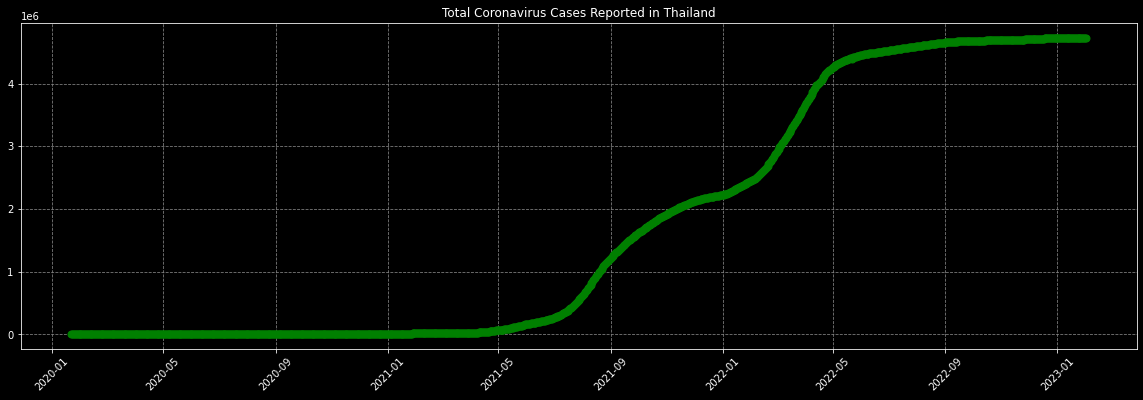

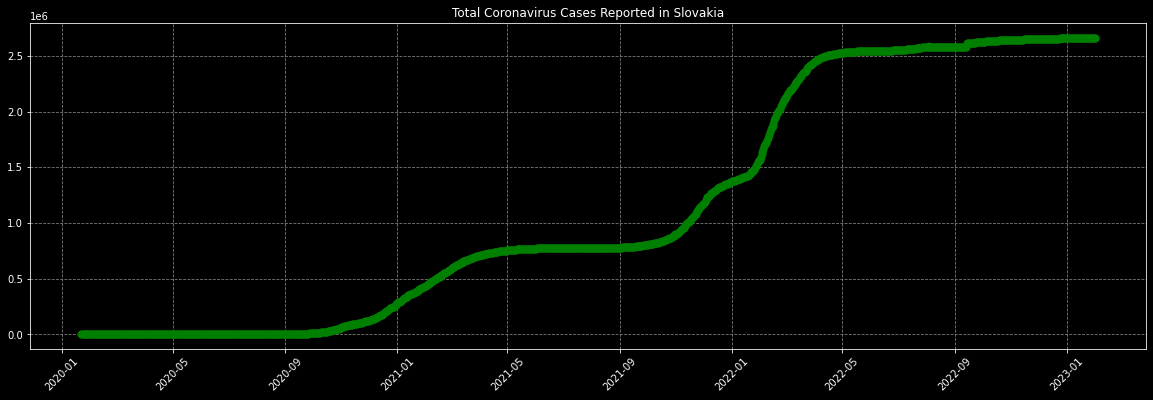

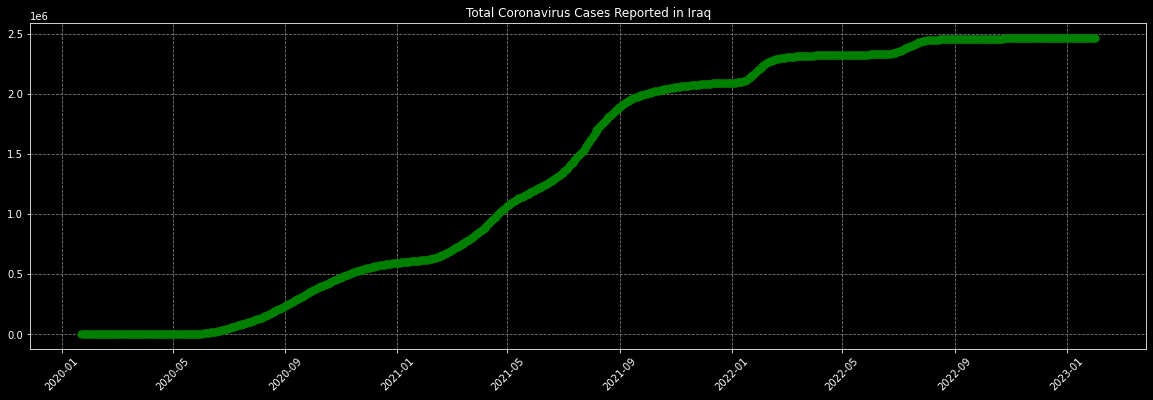

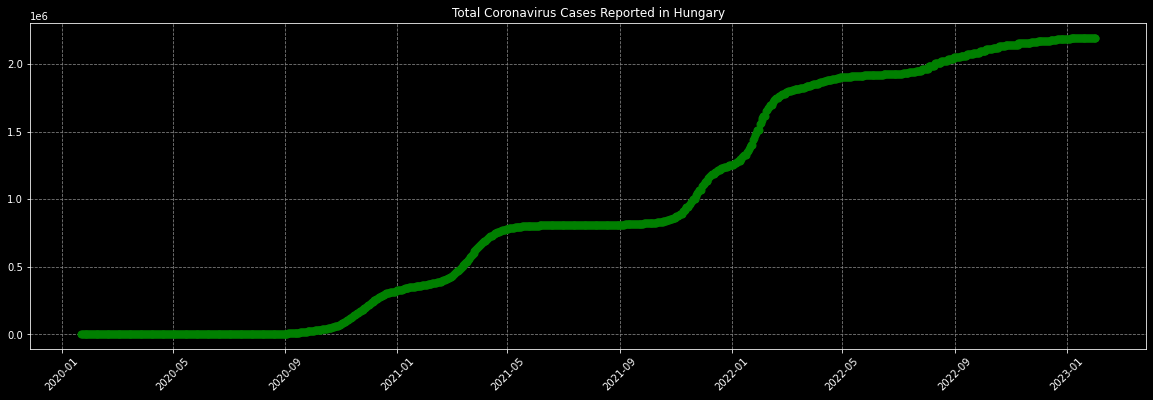

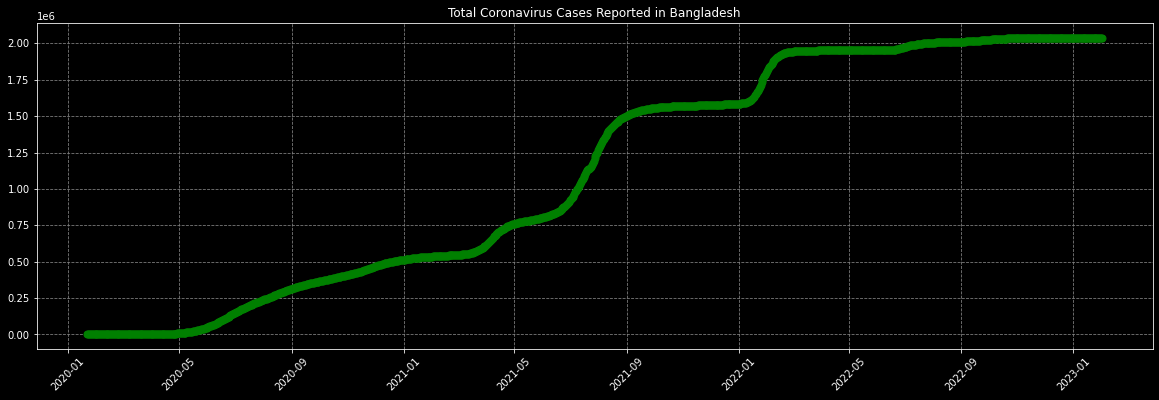

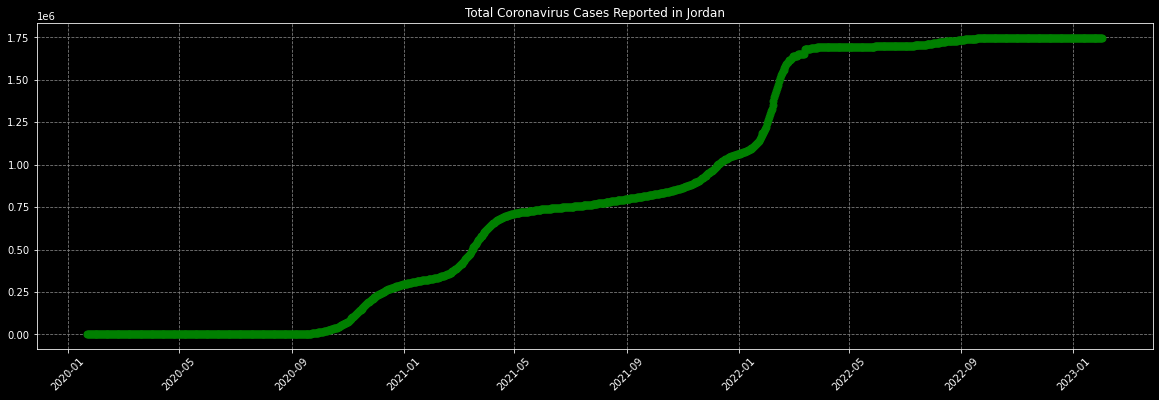

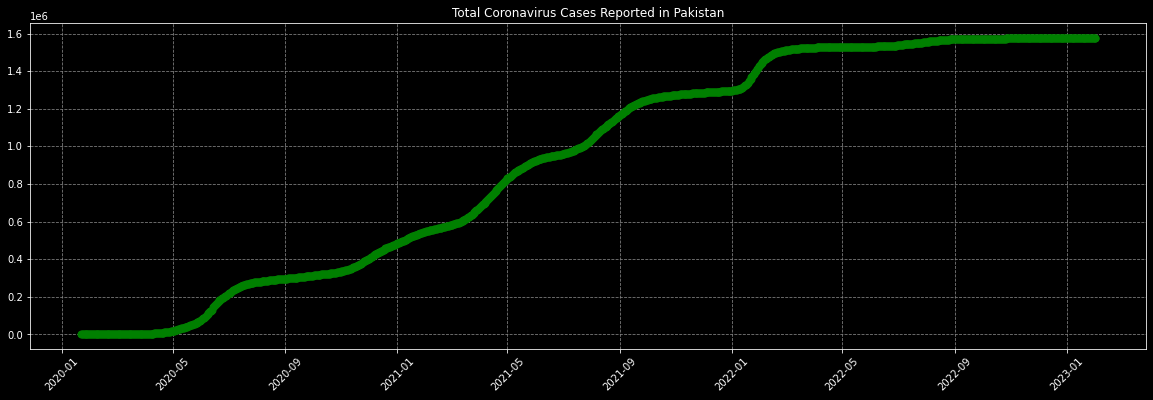

In [39]:
# Line plot for the total number of coronavirus confirmed cases reported in the countries that have flattened the curve.
def flattened_curve(country_list):
  for country in country_list: 
    country_cases = conf_df[conf_df['Country/Region'] == country].iloc[:, 4:].apply(sum, axis=0)
    country_cases.index = pd.to_datetime(country_cases.index)

    plt.figure(figsize=(20, 6))
    plt.title(f'Total Coronavirus Cases Reported in {country}')
    plt.plot(country_cases.index, country_cases, c='g', linewidth=2, marker='o', markersize=7)
    plt.xticks(rotation=45)
    plt.grid(True, 'major', linestyle='--', c='grey')
    plt.show()

flattened_curve(countries[:10])